# Hadronic-Vacuum-Polarization

The electromagnetic current is defined as

$$
J^\mu_\gamma = \sum_f Q_f \, \bar{\psi}_f \gamma^\mu \psi_f ,
$$

where:
- the sum runs over all charged fermion fields $f$,
- $Q_f$ is the electric charge of fermion $f$ in units of the electron charge,
- $\psi_f$ is the fermion field,
- $\gamma^\mu$ are the Dirac gamma matrices.

By restricting to quark fields, which carry a fractional charge, e.g. for up and down quarks
$$
Q_u = \frac{2}{3}, \qquad Q_d = -\frac{1}{3}
$$
one can define the charged currents

$$
J^\mu_{+} = \bar{u} \gamma^\mu d , \qquad
J^\mu_{-} = \bar{d} \gamma^\mu u ,
$$

In [1]:
import giancarlo as gc
gc.PlotStyle.style = 'dark_background'

Qu = gc.Symbol('Q_u')
Qd = gc.Symbol('Q_d')
e = gc.Symbol('e')

u, ubar = gc.SpinorField('u')
d, dbar = gc.SpinorField('d')

def J(x, mu):
    a, b = gc.default.var(), gc.default.var()
    up = Qu * ubar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)
    down = Qd * dbar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)
    return up + down

J('x', r'\mu')

( +Q_u\,\bar{u}(x, x_{1})\,G(\mu, x_{1})\,G(\mu, x_{2})\,u(x, x_{2})+Q_d\,\bar{d}(x, x_{1})\,G(\mu, x_{1})\,G(\mu, x_{2})\,d(x, x_{2}) )

The Hadronic-Vacuum-Polarization (in isosymmetric QCD) is defined by the product of two EM currents. From Wick's theorem we find several contributions.

In [13]:
hvp = J('x', r'\mu') * J('y', r'\nu')
hvp.wick()

( +Q_u^2\,\gamma_{\mu}(x_{14}, x_{15})\,S_u(x, x)(x_{15}, x_{14})\,\gamma_{\nu}(x_{16}, x_{17})\,S_u(y, y)(x_{17}, x_{16})-\,Q_u^2\,\gamma_{\mu}(x_{14}, x_{15})\,S_u(x, y)(x_{15}, x_{16})\,\gamma_{\nu}(x_{16}, x_{17})\,S_u(y, x)(x_{17}, x_{14})+Q_d\,Q_u\,\gamma_{\mu}(x_{14}, x_{15})\,S_u(x, x)(x_{15}, x_{14})\,\gamma_{\nu}(x_{16}, x_{17})\,S_d(y, y)(x_{17}, x_{16})+Q_d\,Q_u\,\gamma_{\mu}(x_{14}, x_{15})\,S_d(x, x)(x_{15}, x_{14})\,\gamma_{\nu}(x_{16}, x_{17})\,S_u(y, y)(x_{17}, x_{16})+Q_d^2\,\gamma_{\mu}(x_{14}, x_{15})\,S_d(x, x)(x_{15}, x_{14})\,\gamma_{\nu}(x_{16}, x_{17})\,S_d(y, y)(x_{17}, x_{16})-\,Q_d^2\,\gamma_{\mu}(x_{14}, x_{15})\,S_d(x, y)(x_{15}, x_{16})\,\gamma_{\nu}(x_{16}, x_{17})\,S_d(y, x)(x_{17}, x_{14}) )

To function `print` forces the nice formatting based on LaTeX style rendering.

In [3]:
hvp = J('x', r'\mu') * J('y', r'\nu')
for c in hvp.wick().trace(['spin']):
    gc.print(c)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

By imposing the isosymmetric limit of QCD, namely the equivalence between up and down quark propagators, we can simplify our expression and collect similar terms. 

This is achieved thanks to the `replace` method which relabels both up and down propagators as $S$. 

Notice that the `trace` method and the `replace` method commute.

In [4]:
hvp.wick().replace({'S_u': 'S', 'S_d': 'S'}).simplify()

( +( +Q_u^2+2\,Q_d\,Q_u+Q_d^2 )\,\gamma_{\mu}(x_{7}, x_{8})\,S(x, x)(x_{8}, x_{7})\,\gamma_{\nu}(x_{9}, x_{10})\,S(y, y)(x_{10}, x_{9})+( -\,Q_u^2-\,Q_d^2 )\,\gamma_{\mu}(x_{7}, x_{8})\,S(x, y)(x_{8}, x_{9})\,\gamma_{\nu}(x_{9}, x_{10})\,S(y, x)(x_{10}, x_{7}) )

In [5]:
hvp.wick().replace({'S_u': 'S', 'S_d': 'S'}).trace(['spin']).simplify()

( +( +Q_u^2+2\,Q_d\,Q_u+Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ]+( -\,Q_u^2-\,Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, x) ] )

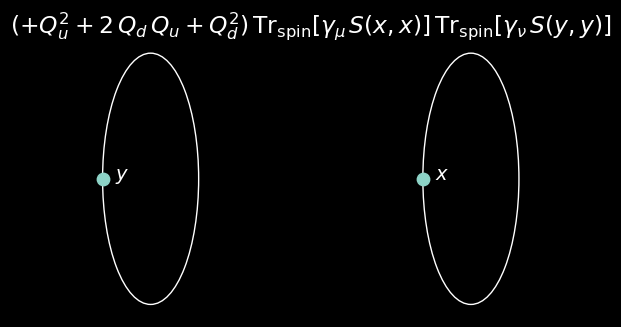

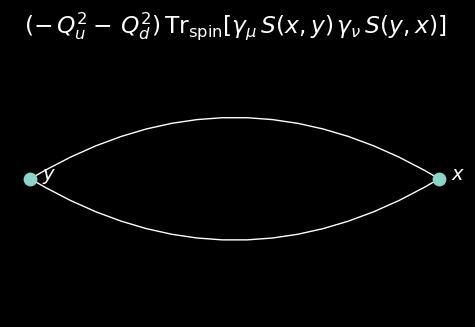

In [6]:
hvp.wick().trace(['spin']).replace(
    {'S_u': 'S', 'S_d': 'S'}
    ).simplify().draw()

# Isospin components

By defining the appropriate linear combinations we can also isolate the different isospin components.
The EM current can be separated in two parts

$$
J^\mu_\gamma = J^\mu_{(0)} + J^\mu_{(1)}
$$

corresponding to

$$
J^\mu_{(0)} = Q_+ \, \bar q \gamma^\mu q
= Q_+ \left( \bar u \gamma^\mu u + \bar d \gamma^\mu d \right)
$$

and

$$
J^\mu_{(1)} = Q_- \, \bar q \gamma^\mu \tau_3 q
= Q_- \left( \bar u \gamma^\mu u - \bar d \gamma^\mu d \right)
$$

Notice that we used the following definitions
$$
Q_+ \equiv \frac{Q_u + Q_d}{2}, \qquad
Q_- \equiv \frac{Q_u - Q_d}{2}
$$



In [7]:
Qp = gc.Symbol('Q_+')
Qm = gc.Symbol('Q_-')

def J_iso(x, mu, sa=gc.default.var(), sb=gc.default.var(), i=None):
    up = ubar(x,sa) * gc.DiracGamma(mu,sa,sb) * u(x,sb)
    down = dbar(x,sa) * gc.DiracGamma(mu,sa,sb) * d(x,sb)
    if i==0:
        return gc.CNumber(1,2) * Qp * (up+down)
    elif i==1:
        return gc.CNumber(1,2) * Qm * (up - down)
    return gc.CNumber(1,2) * Qp * (up+down) + (gc.CNumber(1,2) * Qm * (up - down))

J_iso('x', r'\mu')

( +\frac{1}{2}\,Q_+\,\bar{u}(x, x_{11})\,G(\mu, x_{11})\,G(\mu, x_{12})\,u(x, x_{12})+\frac{1}{2}\,Q_+\,\bar{d}(x, x_{11})\,G(\mu, x_{11})\,G(\mu, x_{12})\,d(x, x_{12})+\frac{1}{2}\,Q_-\,\bar{u}(x, x_{11})\,G(\mu, x_{11})\,G(\mu, x_{12})\,u(x, x_{12})-\frac{1}{2}\,Q_-\,\bar{d}(x, x_{11})\,G(\mu, x_{11})\,G(\mu, x_{12})\,d(x, x_{12}) )

In [8]:
hvp = J_iso('x', r'\mu') * J_iso('y', r'\nu')
for c in hvp.wick().trace(['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify():
    gc.log(c)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Strong isospin-breaking correction

To further illustrate the features of the library we perform the insertion of the scalar operator

$$
    \Delta_{m_u} \bar u(x) u(x) + \Delta_{m_d} \bar d(x) d(x)
$$

responsible for the leading strong-isospin breaking corrections.

In [9]:
dmu = gc.Symbol(r'\Delta_{m_u}')
dmd = gc.Symbol(r'\Delta_{m_d}')
dmp = gc.Symbol(r'\Delta_{m_+}')
dmm = gc.Symbol(r'\Delta_{m_-}')

def Scalar(x):
    s = gc.default.var()
    A = ubar(x, s) * u(x, s)
    B = dbar(x, s) * d(x, s)
    return gc.CNumber(1,2) * dmp * (A + B) + gc.CNumber(1,2) * dmm * (A - B)

hvp_sib = J_iso('x', r'\mu', 's_a', 's_b') * Scalar('z') * J_iso('y', r'\nu', 's_c', 's_d')
hvp_sib_2 = hvp_sib.wick().replace({'S_u': 'S', 'S_d': 'S'})
print('Total terms after Wick contractions = ', len(hvp_sib_2))

syms = []
syms.append(gc.ExchangeSymmetry(pos=['x', 'y'], lorentz=[r'\mu',r'\nu']))
syms.append(gc.ExchangeSymmetry(spin=['s_a','s_c']))
syms.append(gc.ExchangeSymmetry(spin=['s_b','s_d']))


Total terms after Wick contractions =  128


In [10]:
print('Terms after algebraic simplification =', len(hvp_sib_2.simplify()))

Terms after algebraic simplification = 6


In [11]:
hvp_sib_s = hvp_sib_2.simplify(*syms)
topo = hvp_sib_s.trace(['spin'])
print('Terms after further simplication w/ symmetries = ', len(topo))

Terms after further simplication w/ symmetries =  4


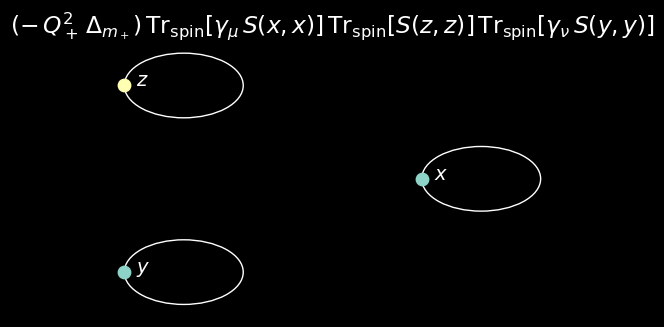

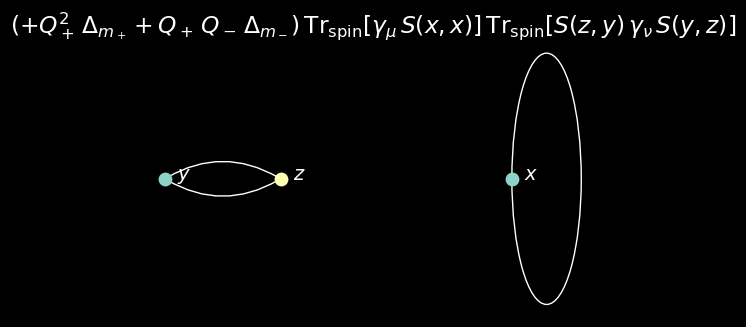

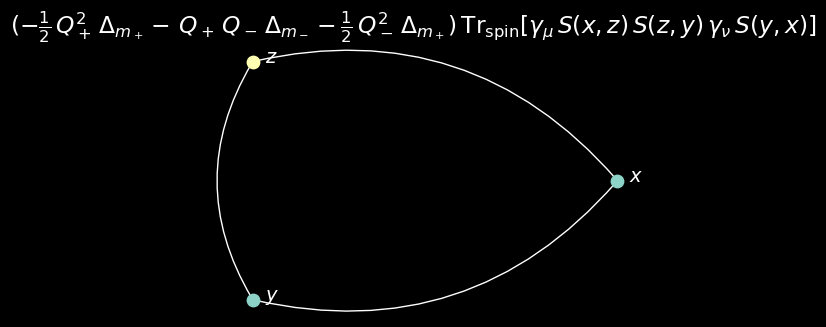

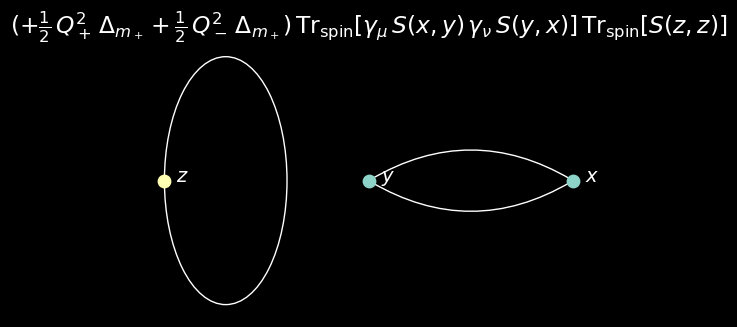

In [12]:
gc.PlotStyle.points['z'] = gc.PlotStyle.point(color='C1')
topo.draw()